# Data Wrangling

We will use a bike.csv to perform all the operations

## Objectives

*   Handle missing values
*   Correct and clear data and change data format
*   Standardize and normalize data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import string


df = pd.read_csv("bikes.csv")
alphabet = list(string.ascii_lowercase)
alphabet.extend(list(string.ascii_uppercase))

In [2]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [3]:
missing_data = df.isnull()
missing_data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

model_name
False    7857
Name: model_name, dtype: int64

model_year
False    7857
Name: model_year, dtype: int64

kms_driven
False    7857
Name: kms_driven, dtype: int64

owner
False    7857
Name: owner, dtype: int64

location
False    7838
True       19
Name: location, dtype: int64

mileage
False    7846
True       11
Name: mileage, dtype: int64

power
False    7826
True       31
Name: power, dtype: int64

price
False    7857
Name: price, dtype: int64



In [5]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [6]:
df["power"].value_counts()

19.80 bhp           922
13 bhp              354
27.20 bhp           283
19 bhp              271
24.50 bhp           207
                   ... 
20.51 bhp             1
25.1 bhp              1
85.8 BHP              1
15.1 bhp              1
14.9 kW (20 BHP)      1
Name: power, Length: 272, dtype: int64

In [7]:
for x in df["power"]:
    a = str(x)[:2]
    df["power"] = df["power"].replace(x,a)
df.power = df.power.astype(str)
df.power = df.power.str.replace('.', '')
df.power = df.power.str.replace('na', '')
df.replace("", np.nan, inplace = True)

C:\Users\ahmed\AppData\Local\Temp/ipykernel_14460/2394689386.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.power = df.power.str.replace('.', '')


In [8]:
df.power.value_counts()

19    1509
14     710
8      516
24     478
13     436
      ... 
85       1
84       1
57       1
83       1
22       1
Name: power, Length: 64, dtype: int64

In [9]:
df.power.astype("float")

0       19.0
1       19.0
2       28.0
3       34.0
4       30.0
        ... 
7852    16.0
7853     7.0
7854    17.0
7855    11.0
7856    21.0
Name: power, Length: 7857, dtype: float64

In [10]:
avg_power = df["power"].astype("float").mean(axis=0)
print("Average power:", avg_power)
df["power"].replace(np.nan, avg_power, inplace=True)

Average power: 19.49348326092512


In [11]:
df.power.astype("int")

0       19
1       19
2       28
3       34
4       30
        ..
7852    16
7853     7
7854    17
7855    11
7856    21
Name: power, Length: 7857, dtype: int32

In [12]:
df.mileage = df.mileage.str.replace("\n\n",'')
df.mileage = df.mileage.str.replace("Kmpl",'')
df.mileage = df.mileage.str.replace("kmpl",'')
df.mileage = df.mileage.str.replace("KMPL",'')
df.mileage = df.mileage.str.replace("Kms",'')
df.mileage = df.mileage.str.replace(" ",'')
df.mileage = df.mileage.str.replace("LiquidCooled","")
df.replace("", np.nan, inplace = True)

In [13]:
df.mileage.value_counts(50)

35      0.184809
40      0.107723
65      0.100099
45      0.048991
25      0.048002
          ...   
96.9    0.000141
54      0.000141
20.3    0.000141
14      0.000141
23      0.000141
Name: mileage, Length: 81, dtype: float64

In [14]:
for x in df.mileage:
    if "-" in str(x):
        a = int(x[:2])
        b = (int(x[-2:]))
        sum = (b+a)/2
        
        df.replace(x, sum, inplace = True)

In [15]:
avg_mileage = df["mileage"].astype("float").mean(axis=0)
print("Average mileage:", avg_power)
df["mileage"].replace(np.nan, avg_mileage, inplace=True)

Average mileage: 19.49348326092512


In [16]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,44.845284,30,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42,16,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80,7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65,17,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57,11,49000


In [17]:
df.owner.value_counts()

first owner             6817
second owner             833
third owner              134
fourth owner or more      73
Name: owner, dtype: int64

In [18]:
dummy_variable_1 = pd.get_dummies(df["owner"])

df = pd.concat([df, dummy_variable_1], axis=1)

df.drop("owner", axis = 1, inplace=True)

In [19]:
df.model_year.value_counts()

2017    1160
2018    1101
2016    1026
2019     895
2015     785
2014     620
2013     443
2020     380
2012     332
2011     268
2010     210
2009     161
2008      92
2021      91
2007      80
2006      62
2005      44
2004      27
2003      12
2001      10
2002       8
1982       7
2000       7
1997       5
1991       4
1998       4
1990       4
1996       4
1986       3
1999       3
1950       2
1993       2
1994       2
1978       1
1970       1
1985       1
Name: model_year, dtype: int64

In [20]:
bins = np.linspace(min(df["model_year"]), max(df["model_year"]), 4)
bins

array([1950.        , 1973.66666667, 1997.33333333, 2021.        ])

In [21]:
group_names = ['Old', 'Medium', 'New']
df['model_year-binned'] = pd.cut(df['model_year'], bins, labels=group_names, include_lowest=True )
df[['model_year','model_year-binned']].head(20)

,model_year,model_year-binned
0,2017,New
1,2016,New
2,2012,New
3,2017,New
4,2020,New
5,2012,New
6,2016,New
7,2020,New
8,2018,New
9,2014,New


In [22]:
df["model_year-binned"].value_counts()

New       7821
Medium      33
Old          3
Name: model_year-binned, dtype: int64

Text(0.5, 1.0, 'model_year bins')

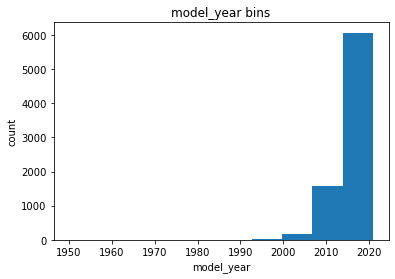

In [23]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["model_year"])

# set x/y labels and plot title
plt.pyplot.xlabel("model_year")
plt.pyplot.ylabel("count")
plt.pyplot.title("model_year bins")

In [24]:
df

,model_name,model_year,kms_driven,location,mileage,power,price,first owner,fourth owner or more,second owner,third owner,model_year-binned
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,hyderabad,35,19,63500,1,0,0,0,New
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,hyderabad,35,19,115000,1,0,0,0,New
2,Hyosung GT250R 2012,2012,14795 Km,hyderabad,30,28,300000,1,0,0,0,New
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,pondicherry,28,34,100000,1,0,0,0,New
4,Jawa Perak 330cc 2020,2020,2000 Km,bangalore,44.845284,30,197500,1,0,0,0,New
...,...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,agra,42,16,55000,1,0,0,0,New
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,delhi,80,7,28000,1,0,0,0,New
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,bangalore,65,17,61740,1,0,0,0,New
7855,Bajaj V15 150cc 2016,2016,7524 Km,bangalore,57,11,49000,1,0,0,0,New


Text(0.5, 1.0, 'model_year bins')

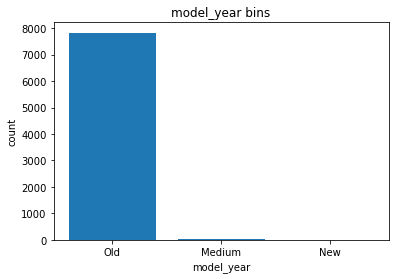

In [25]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["model_year-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("model_year")
plt.pyplot.ylabel("count")
plt.pyplot.title("model_year bins")

In [26]:
df.kms_driven

0              17000 Km
1              50000 Km
2              14795 Km
3        Mileage 28 Kms
4               2000 Km
             ...       
7852            7000 Km
7853    Mileage 80 Kmpl
7854            6407 Km
7855            7524 Km
7856           15000 Km
Name: kms_driven, Length: 7857, dtype: object

In [27]:
for x in df.kms_driven:
    for y in alphabet:
        if y in x:
            df.kms_driven = df.kms_driven.str.replace(y,'')

In [28]:
for x in df.kms_driven:
    if "-" in str(x):
        a = int(x[:2])
        b = (int(x[-2:]))
        sum = (b+a)/2
        
        df.replace(x, sum, inplace = True)

In [29]:
df.replace('', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)

In [30]:
df['kms_driven'].str.contains('partial_string').any()

False

In [31]:
df.kms_driven = df.kms_driven.astype("float")

In [32]:
df 

,model_name,model_year,kms_driven,location,mileage,power,price,first owner,fourth owner or more,second owner,third owner,model_year-binned
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,hyderabad,35,19,63500,1,0,0,0,New
1,Royal Enfield Classic 350cc 2016,2016,50000.0,hyderabad,35,19,115000,1,0,0,0,New
2,Hyosung GT250R 2012,2012,14795.0,hyderabad,30,28,300000,1,0,0,0,New
3,Bajaj Dominar 400 ABS 2017,2017,28.0,pondicherry,28,34,100000,1,0,0,0,New
4,Jawa Perak 330cc 2020,2020,2000.0,bangalore,44.845284,30,197500,1,0,0,0,New
...,...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,agra,42,16,55000,1,0,0,0,New
7853,Bajaj Discover 100cc 2015,2015,80.0,delhi,80,7,28000,1,0,0,0,New
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,bangalore,65,17,61740,1,0,0,0,New
7855,Bajaj V15 150cc 2016,2016,7524.0,bangalore,57,11,49000,1,0,0,0,New


In [33]:
df.dtypes

model_name                object
model_year                 int64
kms_driven               float64
location                  object
mileage                   object
power                     object
price                      int64
first owner                uint8
fourth owner or more       uint8
second owner               uint8
third owner                uint8
model_year-binned       category
dtype: object

In [34]:
df["price"] = df["price"]/82.30
df.rename(columns={'price': 'price(usd)'})

,model_name,model_year,kms_driven,location,mileage,power,price(usd),first owner,fourth owner or more,second owner,third owner,model_year-binned
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,hyderabad,35,19,771.567436,1,0,0,0,New
1,Royal Enfield Classic 350cc 2016,2016,50000.0,hyderabad,35,19,1397.326853,1,0,0,0,New
2,Hyosung GT250R 2012,2012,14795.0,hyderabad,30,28,3645.200486,1,0,0,0,New
3,Bajaj Dominar 400 ABS 2017,2017,28.0,pondicherry,28,34,1215.066829,1,0,0,0,New
4,Jawa Perak 330cc 2020,2020,2000.0,bangalore,44.845284,30,2399.756987,1,0,0,0,New
...,...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,agra,42,16,668.286756,1,0,0,0,New
7853,Bajaj Discover 100cc 2015,2015,80.0,delhi,80,7,340.218712,1,0,0,0,New
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,bangalore,65,17,750.182260,1,0,0,0,New
7855,Bajaj V15 150cc 2016,2016,7524.0,bangalore,57,11,595.382746,1,0,0,0,New


In [35]:
bins2 = np.linspace(min(df["price"]), max(df["price"]), 4)
group_names2 = ['Cheap', 'Medium', 'Expensive']
df['price-binned'] = pd.cut(df['price'], bins2, labels=group_names2, include_lowest=True )
df[['price','price-binned']].head(20)
df["price-binned"].value_counts()

Cheap        7816
Medium         40
Expensive       1
Name: price-binned, dtype: int64

Text(0.5, 1.0, 'Price bins')

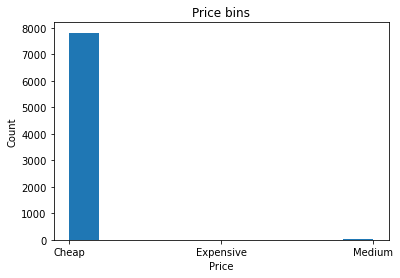

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["price-binned"])

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Price bins")

In [37]:
df

,model_name,model_year,kms_driven,location,mileage,power,price,first owner,fourth owner or more,second owner,third owner,model_year-binned,price-binned
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,hyderabad,35,19,771.567436,1,0,0,0,New,Cheap
1,Royal Enfield Classic 350cc 2016,2016,50000.0,hyderabad,35,19,1397.326853,1,0,0,0,New,Cheap
2,Hyosung GT250R 2012,2012,14795.0,hyderabad,30,28,3645.200486,1,0,0,0,New,Cheap
3,Bajaj Dominar 400 ABS 2017,2017,28.0,pondicherry,28,34,1215.066829,1,0,0,0,New,Cheap
4,Jawa Perak 330cc 2020,2020,2000.0,bangalore,44.845284,30,2399.756987,1,0,0,0,New,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,agra,42,16,668.286756,1,0,0,0,New,Cheap
7853,Bajaj Discover 100cc 2015,2015,80.0,delhi,80,7,340.218712,1,0,0,0,New,Cheap
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,bangalore,65,17,750.182260,1,0,0,0,New,Cheap
7855,Bajaj V15 150cc 2016,2016,7524.0,bangalore,57,11,595.382746,1,0,0,0,New,Cheap
